In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gpflow
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from xgboost import XGBRegressor
import joblib

2024-06-16 16:12:51.323124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 16:12:51.953554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /share/apps/22.04/openmpi/4.1.5/lib:/share/apps/22.04/slurm/23.02.7/lib
2024-06-16 16:12:51.953637: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-16 16:12:52.081719: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has al

In [2]:
pfts = ["Tropical", "Temperate_Broadleaf","Temperate_Deciduous"
        ,"Temperate_Coniferous","Boreal"]

var_list = ['GPP', 'NPP', 'VEGC', 'SOILORGC']


In [6]:
files = ['Temperate_BroadleafMARS_metrics.csv'
,'Temperate_ConiferousMARS_metrics.csv'
,'Temperate_DeciduousMARS_metrics.csv'
,'TropicalMARS_metrics.csv'
,'metrics_list_Boreal.csv'
,'metrics_list_Temperate_Broadleaf.csv'
,'metrics_list_Temperate_Coniferous.csv'
,'metrics_list_Temperate_Deciduous.csv'
,'metrics_list_Tropical.csv']
pfts = ['Temperate_Broadleaf'
,'Temperate_Coniferous'
,'Temperate_Deciduous'
,'Tropical'
,'Boreal'
,'Temperate_Broadleaf'
,'Temperate_Coniferous'
,'Temperate_Deciduous'
,'Tropical']


metrics = pd.DataFrame({'file': files, 'pft': pfts})

# Add 'model' column
metrics['model'] = metrics['file'].apply(lambda x: 'MARS' if 'MARS' in x else 'XGB')

# Display the DataFrame
print(metrics)

                                    file                   pft model
0    Temperate_BroadleafMARS_metrics.csv   Temperate_Broadleaf  MARS
1   Temperate_ConiferousMARS_metrics.csv  Temperate_Coniferous  MARS
2    Temperate_DeciduousMARS_metrics.csv   Temperate_Deciduous  MARS
3               TropicalMARS_metrics.csv              Tropical  MARS
4                metrics_list_Boreal.csv                Boreal   XGB
5   metrics_list_Temperate_Broadleaf.csv   Temperate_Broadleaf   XGB
6  metrics_list_Temperate_Coniferous.csv  Temperate_Coniferous   XGB
7   metrics_list_Temperate_Deciduous.csv   Temperate_Deciduous   XGB
8              metrics_list_Tropical.csv              Tropical   XGB


In [11]:
tt = pd.read_csv('/home/smmrrr/TEM_Analysis/TEM_Analysis/model_data/model_output/'+metrics.loc[0, 'file'])
tt['pft'] = metrics.loc[0, 'pft']
tt['model'] = metrics.loc[0, 'model']
tt

,Variable,R2_Train,R2_Test,RMSE_Train,RMSE_Test,Bias_Train,Bias_Test,pft,model
0,GPP,0.564544,0.564097,43.315376,43.306439,7.596356e-13,0.032243,Temperate_Broadleaf,MARS
1,NPP,0.482761,0.482002,20.813005,20.803688,5.908265e-13,0.030693,Temperate_Broadleaf,MARS
2,VEGC,0.726051,0.724538,2660.707563,2664.613374,-1.878057e-10,4.756396,Temperate_Broadleaf,MARS
3,SOILORGC,0.761354,0.761689,1201.616411,1200.285126,3.551596e-11,1.440694,Temperate_Broadleaf,MARS


In [13]:
# Base directory for files
base_dir = '/home/smmrrr/TEM_Analysis/TEM_Analysis/model_data/model_output/'

# Initialize an empty DataFrame to concatenate all results
combined_df = pd.DataFrame()

# Loop through each row in the DataFrame
for i in range(len(metrics)):
    tt = pd.read_csv(base_dir+metrics.loc[i, 'file'])
    tt['pft'] = metrics.loc[i, 'pft']
    tt['model'] = metrics.loc[i, 'model']
    tt.columns = tt.columns.str.replace(' ', '_')
    # Append to the combined DataFrame
    combined_df = pd.concat([combined_df, tt], ignore_index=True, axis = 0)

# Display the combined DataFrame
print(combined_df)

    Variable  R2_Train   R2_Test   RMSE_Train    RMSE_Test    Bias_Train  \
0        GPP  0.564544  0.564097    43.315376    43.306439  7.596356e-13   
1        NPP  0.482761  0.482002    20.813005    20.803688  5.908265e-13   
2       VEGC  0.726051  0.724538  2660.707563  2664.613374 -1.878057e-10   
3   SOILORGC  0.761354  0.761689  1201.616411  1200.285126  3.551596e-11   
4        GPP  0.502813  0.503306    36.689246    36.703734 -9.329409e-13   
5        NPP  0.384613  0.385309    21.357829    21.365969 -4.147771e-13   
6       VEGC  0.566492  0.567231  2919.258064  2921.151326 -4.745401e-11   
7   SOILORGC  0.317375  0.317507  1777.613569  1778.403001 -1.126581e-10   
8        GPP  0.527580  0.527232    32.679447    32.726475  6.015787e-14   
9        NPP  0.429446  0.429888    19.165638    19.178133  1.494244e-13   
10      VEGC  0.740420  0.741060  2543.212497  2542.135032 -3.800972e-10   
11  SOILORGC  0.562005  0.562696  1021.837776  1021.123532 -5.241710e-11   
12       GPP

In [17]:
combined_df

,Variable,R2_Train,R2_Test,RMSE_Train,RMSE_Test,Bias_Train,Bias_Test,pft,model,Unnamed:_0
0,GPP,0.564544,0.564097,43.315376,43.306439,7.596356e-13,0.032243,Temperate_Broadleaf,MARS,NaN
1,NPP,0.482761,0.482002,20.813005,20.803688,5.908265e-13,0.030693,Temperate_Broadleaf,MARS,NaN
2,VEGC,0.726051,0.724538,2660.707563,2664.613374,-1.878057e-10,4.756396,Temperate_Broadleaf,MARS,NaN
3,SOILORGC,0.761354,0.761689,1201.616411,1200.285126,3.551596e-11,1.440694,Temperate_Broadleaf,MARS,NaN
4,GPP,0.502813,0.503306,36.689246,36.703734,-9.329409e-13,-0.000080,Temperate_Coniferous,MARS,NaN
5,NPP,0.384613,0.385309,21.357829,21.365969,-4.147771e-13,-0.003505,Temperate_Coniferous,MARS,NaN
6,VEGC,0.566492,0.567231,2919.258064,2921.151326,-4.745401e-11,-2.917613,Temperate_Coniferous,MARS,NaN
7,SOILORGC,0.317375,0.317507,1777.613569,1778.403001,-1.126581e-10,0.106519,Temperate_Coniferous,MARS,NaN
8,GPP,0.527580,0.527232,32.679447,32.726475,6.015787e-14,-0.031297,Temperate_Deciduous,MARS,NaN
9,NPP,0.429446,0.429888,19.165638,19.178133,1.494244e-13,-0.019753,Temperate_Deciduous,MARS,NaN


In [ ]:
all_time_results['pft'] = pft
all_time_results['period'] = 'all_time'
past_future_results['period'] = 'historical_train_future_test'
future_results['period'] = 'future_only'

model_compare = pd.concat([model_compare
    ,pd.concat([all_time_results, past_future_results, future_results])
])
print(model_compare)


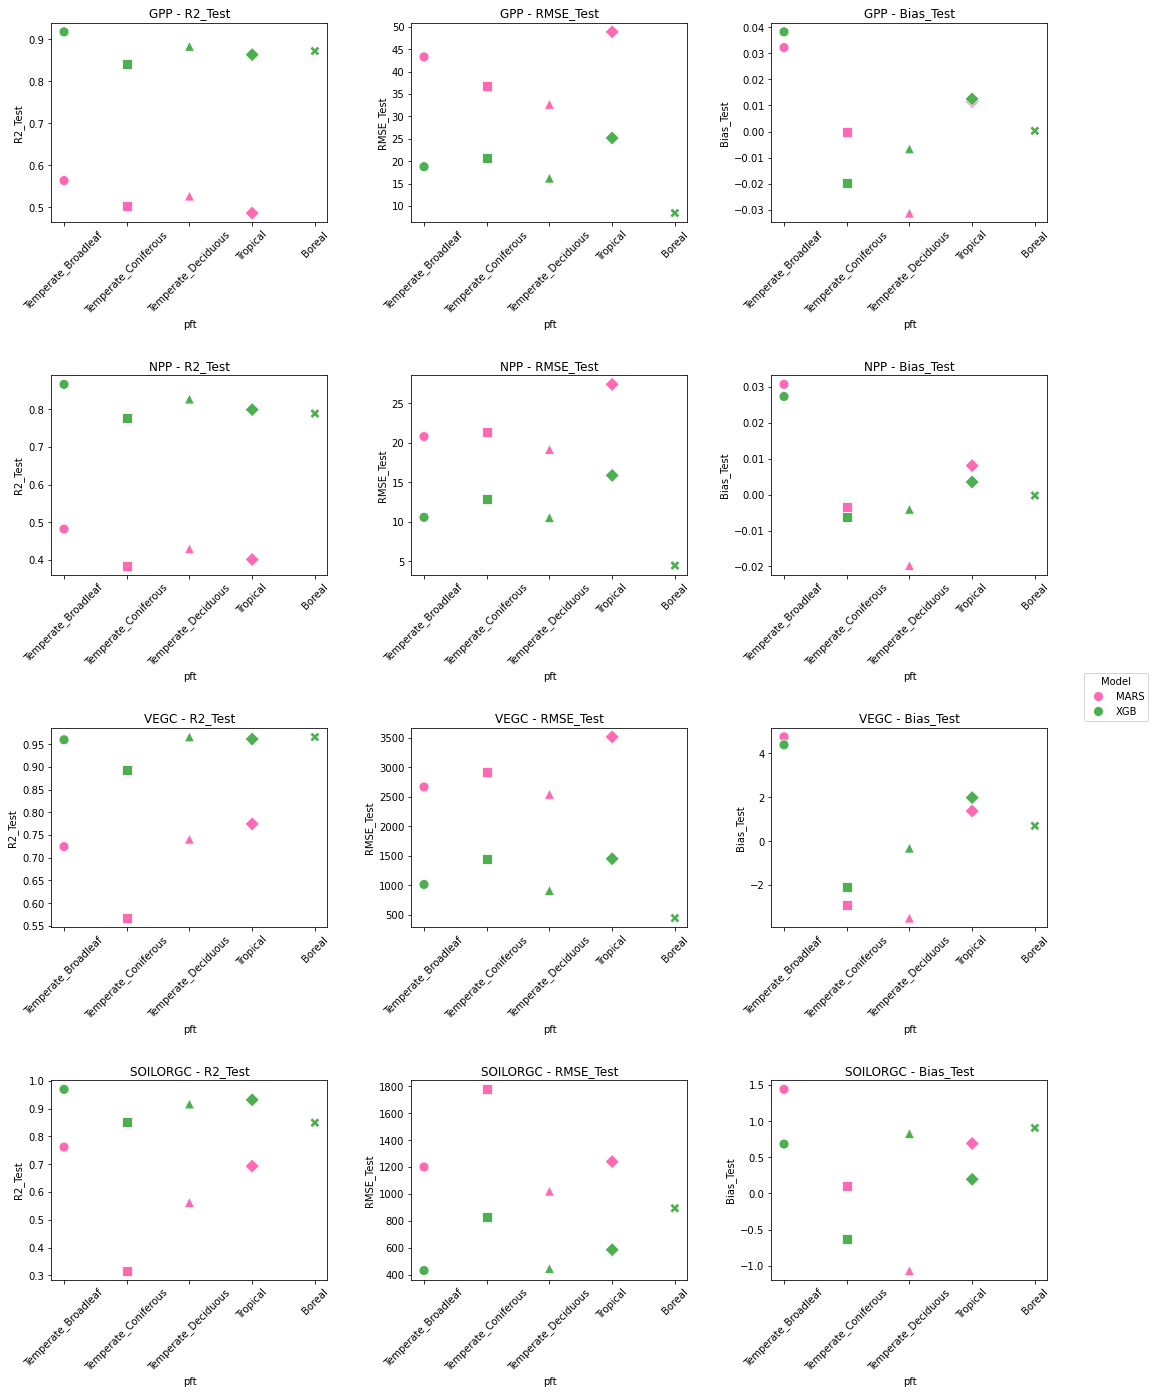

In [21]:
# Define the columns (metrics) to plot
plot_columns = ['R2_Test', 'RMSE_Test', 'Bias_Test']

# Define markers for each variable
markers = {pft: marker for pft, marker in zip(combined_df['pft'].unique(), ['o', 's', '^', 'D', 'X'])}

# Custom colors
colors = ['#FF69B4',  # Medium Pink
          '#4CAF50',  # Medium Green
          '#1E90FF']  # Medium blue


# Create a palette dictionary for periods
unique_periods = combined_df['model'].unique()
palette = {period: color for period, color in zip(unique_periods, colors)}

# Set up the grid size based on the number of variables and metrics
num_variables = combined_df['Variable'].nunique()
num_metrics = len(plot_columns)

fig, axes = plt.subplots(num_variables, num_metrics, figsize=(num_metrics * 6, 20))

for row_idx, variable in enumerate(combined_df['Variable'].unique()):
    for col_idx, metric in enumerate(plot_columns):
        ax = axes[row_idx, col_idx] if num_variables > 1 else axes[col_idx]
        sns.scatterplot(
            data=combined_df[combined_df['Variable'] == variable],
            x='pft',
            y=metric,
            hue='model',
            style='pft',  # Change the style to pft
            palette=palette,  # Use the custom color palette
            markers=markers,
            s=100,  # Increase marker size
            ax=ax
        )
        ax.set_title(f"{variable} - {metric}")
        ax.legend_.remove()  # Remove individual legends
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Add a single legend to the right
handles, labels = axes[0, 0].get_legend_handles_labels()
# Extract unique handles and labels for 'period'
period_handles = {label: handle for handle, label in zip(handles, labels) if label in combined_df['model'].unique()}

fig.legend(period_handles.values(), period_handles.keys(), loc='center left', bbox_to_anchor=(.85, 0.5), title="Model")

# Adjust layout for better readability
fig.tight_layout(pad=3.0, rect=[0, 0, 0.85, 1])  # Adjust the rect parameter to make room for the legend

plt.show()